<a href="https://colab.research.google.com/github/Itallo0708/Computational-Mathematics/blob/main/notebooks/Atividade_2_2_Linear_regression_p_value_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão A)
Iremos começar importando bibliotecas necessárias para essa questão.

In [33]:
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles
import numpy as np
from scipy import stats

# Funções ultilizadas na questão

In [34]:
def calculos_regress(x, y):
  slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
  # Covariância
  matriz_cov = np.cov(x, y)
  covariancia = matriz_cov[0][1]

  return slope, intercept, r_value, p_value, std_err, covariancia

# Função para o plot dos gráficos
def plotar_graficos(x, y, estatisticas, titulo, cor):
  slope, intercept, r_value, p_value, std_err, covariancia = estatisticas

  # Pontos
  plt.scatter(x, y, color = cor, s= 150, edgecolor='black', alpha= 0.9, label ='Dados')

  # Reta
  linha_x = np.array([min(x), max(x)])
  linha_y = (slope * linha_x) + intercept
  plt.plot(linha_x, linha_y, color='red', linestyle = '--', linewidth =2, label='Regressão')

  # Caixa de texto
  info = f'P-value: {p_value:.4e}\nCovariancia: {covariancia:.2f}'
  plt.text(0.05, 0.95, info, transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

  # Plot
  plt.title(titulo)
  plt.xlabel("Gene X")
  plt.ylabel("Gene Y")
  plt.legend()
  plt.grid(True, linestyle=':', alpha=0.6)
  plt.show()

### Gráfico 1

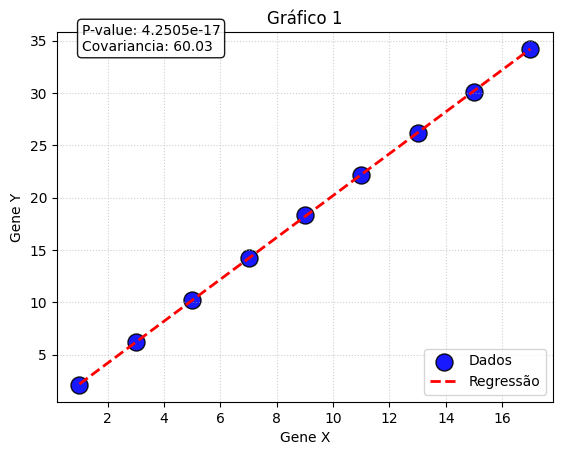

In [35]:
# Definindo o conjunto dos pontos
x1 = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17])

y1 = np.array([2.1, 6.2, 10.2, 14.2, 18.3, 22.2, 26.2, 30.1, 34.2])

# Executando exemplo
estatisticas = calculos_regress(x1, y1)
plotar_graficos(x1, y1, estatisticas, 'Gráfico 1', 'blue')


* $P-value$:
    * O valor obtido foi extremamente baixo, próximo de zero e muito inferior ao limiar padrão de $0.05$, indicando que a correlação observada é estatisticamente significativa. Podemos afirmar com alta confiança que a associação entre as variáveis não é fruto do acaso.

* 2. Covariância:
    * O valor calculado foi 60.03, sendo um número positivo, confirma que as variáveis têm uma relação direta, quando uma aumenta, a outra também aumenta. A magnitude de 60.03 reflete, em conjunto com a correlação, a forte tendência de crescimento linear observada.

### Gráfico 2

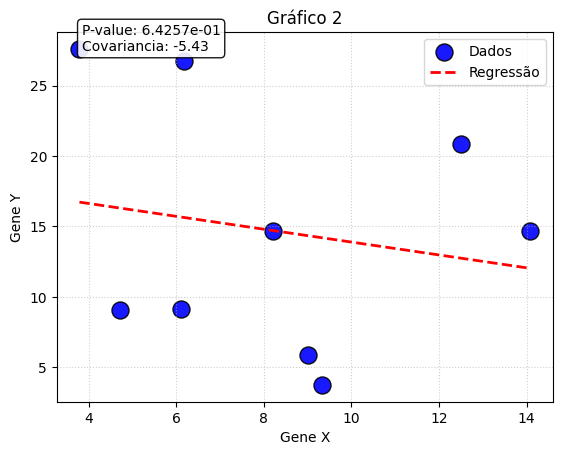

In [89]:
x2 = np.random.uniform(low=np.min(x1), high=np.max(x1), size=9)
y2 = np.random.uniform(low=np.min(y1), high=np.max(y1), size=9)

# Executando exemplo
estatisticas = calculos_regress(x2, y2)
plotar_graficos(x2, y2, estatisticas, 'Gráfico 2', 'blue')

* $P-value$:
    * O valor calculado foi aproximadamente **0.64**. Assim, Este valor é superior ao limite padrão ($\alpha = 0.05$). Isso significa que não podemos rejeitar a hipótese nula. Estatisticamente, não há evidências suficientes para afirmar que existe uma relação linear entre a expressão das duas variáveis e a distribuição dos pontos provavelmente se deve ao acaso.

* Covariância:
    * O valor obtido foi **-5.43**. O sinal negativo indica uma tendência de associação inversa, sugerindo que conforme a variável X aumenta, a variável Y diminuiria. No entanto, dado o alto *p-value*, essa tendência não é confiável para previsões.

Portanto, o modelo de regressão linear não se ajusta bem a estes dados. A dispersão dos pontos é alta e não segue um padrão linear claro.

# Questão B) Estimando um Intervalo de Confiança para a Média

Importando o arquivo csv com os dados amostrais.

In [37]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


### Descrição do Dataset

O dataset contém dados sintéticos sobre hábitos de sono e estilo de vida.


In [38]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/matematica_computacional/Sleep_health_and_lifestyle_dataset.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Nesta análise, será utilizada a variável Sleep Duration (hours) para calcular estatísticas descritivas e construir intervalos de confiança de 90%, 95% e 99% para a média de horas de sono, permitindo estimar esse parâmetro populacional.

In [39]:
df_sleep_duration = df["Sleep Duration"]
df_sleep_duration.head(10)

,Sleep Duration
0,6.1
1,6.2
2,6.2
3,5.9
4,5.9
5,5.9
6,6.3
7,7.8
8,7.8
9,7.8


### Função para os calculos
Essa função realiza os calculos estatisticos necessários, tais como : média, desvio padrão, erro padrão e os limites do intervalo de confiança

In [69]:
def calcular_intervalo(dados, nivel_confianca):
  dados_tratados = dados.dropna()
  n = len(dados_tratados)
  media = np.mean(dados_tratados)
  desvio_padrao = np.std(dados_tratados, ddof=1)
  erro_padrao = desvio_padrao / np.sqrt(n)

  # intervalo
  limite_inferior, limite_superior = stats.t.interval(nivel_confianca, df=n-1, loc=media, scale=erro_padrao)

  return {
      "media": media,
      "desvio_padrao": desvio_padrao,
      "erro_padrao": erro_padrao,
      "limite_inferior": limite_inferior,
      "limite_superior": limite_superior,
      "nivel": nivel_confianca,
      "n": n
  }

### Função para Exibir os Gráficos
Função auxiliar para plotar a distribuição da média e o intervalo de confiança:

In [90]:
def plotar_distribuicao(estatisticas):

    media = estatisticas["media"]
    desvio_padrao = estatisticas["desvio_padrao"]
    erro = estatisticas["erro_padrao"]
    inf = estatisticas["limite_inferior"]
    sup = estatisticas["limite_superior"]
    nivel = estatisticas["nivel"]
    n = estatisticas["n"]

    # Criar dados para a curva Eixo X focado na média
    x = np.linspace(media - 4*erro, media + 4*erro, 1000)
    y = stats.norm.pdf(x, media, erro)

    fig, ax = plt.subplots(figsize=(10, 5))

    # Desenhar a curva
    ax.plot(x, y, color='#d62728', linewidth=2) # Vermelho

    # Preencher a área de confiança
    ax.fill_between(x, y, where=((x >= inf) & (x <= sup)), color='lightgray', alpha=0.7)

    # Linhas verticais
    ax.axvline(media, color='black', linestyle='--', alpha=0.6)
    ax.axvline(inf, color='black', linestyle='--', alpha=0.6)
    ax.axvline(sup, color='black', linestyle='--', alpha=0.6)

    # Caixa de texto
    texto = (f"Média: {media:.2f}\n"
             f"Desvio Padrão: {desvio_padrao:.2f}\n"
             f"Amostra (n): {n}")

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    ax.text(0.05, 0.95, texto, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

    # Remove as marcações do gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_ticks([])

    # Mostrar a média e os limites de confiançna no eixo x
    ax.set_xticks([inf, media, sup])
    ax.set_xticklabels([f'{inf:.2f}', f'{media:.2f}', f'{sup:.2f}'], fontsize=11)

    ax.set_title(f'Distribuição da Média ({nivel*100:.0f}% Confiança)', fontsize=14)

    plt.show()

### Intervalo de Confiança de 90%

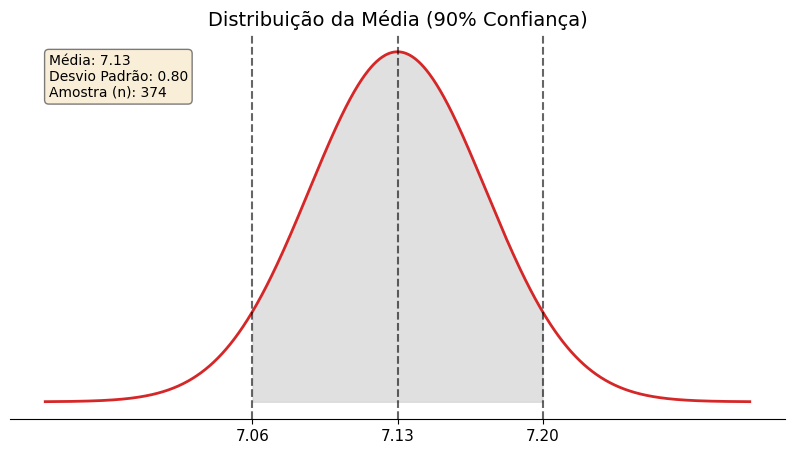

In [77]:
estatisticas_90 = calcular_intervalo(df_sleep_duration, 0.90)
plotar_distribuicao(estatisticas_90)

### Intervalo de Confiança de 95%

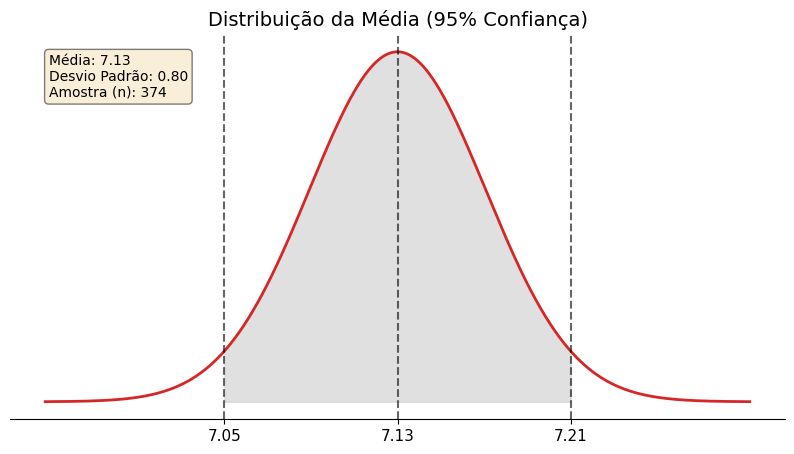

In [76]:
estatisticas_95 = calcular_intervalo(df_sleep_duration, 0.95)
plotar_distribuicao(estatisticas_95)

### Intervalo de Confiança de 99%

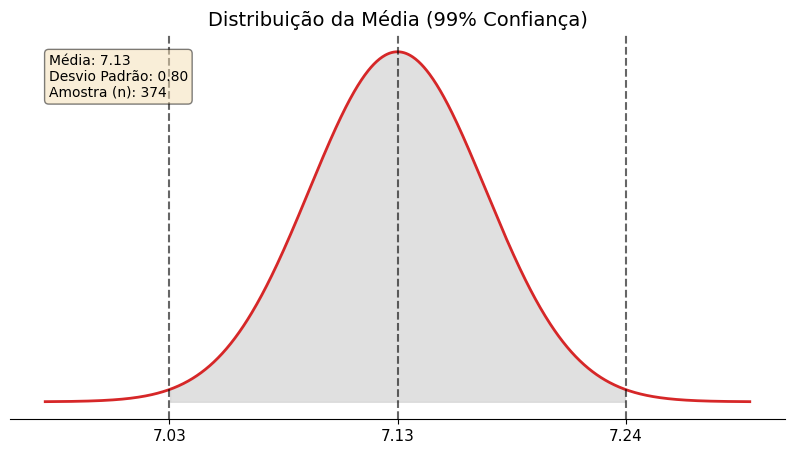

In [78]:
estatisticas_99 = calcular_intervalo(df_sleep_duration, 0.99)
plotar_distribuicao(estatisticas_99)

O intervalo de confiança torna-se mais largo, variando aproximadamente de **7,03 a 7,24**. Isso significa que a estimativa é feita com altíssima confiança, porém com menor precisão, já que o intervalo é mais extenso.
Esse comportamento reflete o trade-off entre confiança e largura do intervalo.

# C) p-value em um Teste de Hipótese
